<div style="text-align: center;">
    <h1>Distinguishing Malignant and Benign Breast Tumors with X-Ray Imaging Data</h1>
</div>


Mammograms are a routine breast cancer screening tool that use X-ray imaging to identify suspicious breast tissue. While mammograms are effective at identifying suspicious tissue, it is challenging to diagnose the suspicious tissue as malignant or benign based on X-ray imaging data alone. For example, the detected tissue could be a benign cyst or calcium deposit, neither of which need to be treated with chemotherapy/surgery.

![Mammogram](mammogram.jpg)


In this notebook I will process and analyze X-ray data collected from breast cancer patients with the goal of using the imaging data to classify each image as either malignant or benign! Dataset comes from https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Mammogram image comes from https://beta.mountelizabeth.com.sg/healthplus/article/what-if-something-is-detected-on-my-mammogram

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
diagnosis=data.loc[:,["diagnosis"]]
diagnosis.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [3]:
data=data.drop(['id','diagnosis'],axis=1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


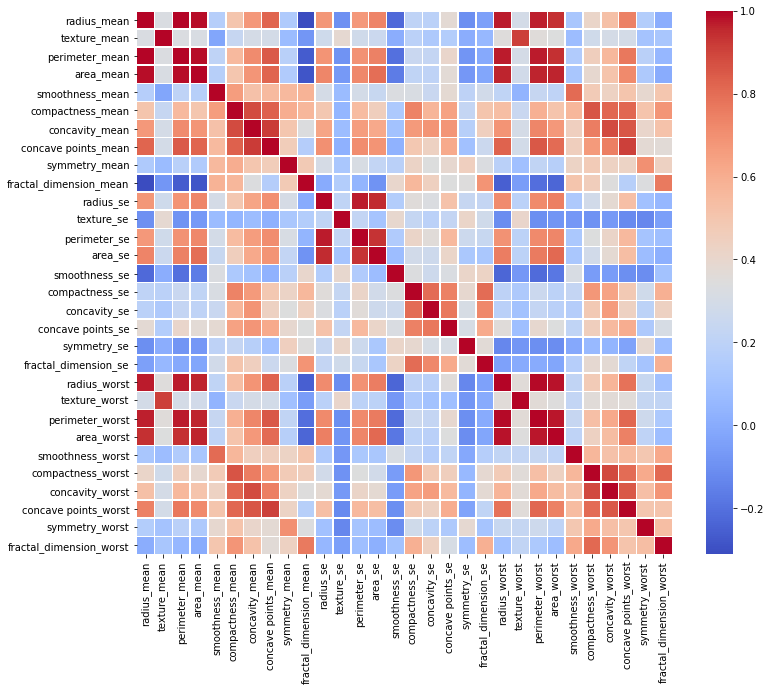

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=data.corr()
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, ax=ax)

# Show the plot
plt.show()

There are strong correlations for a lot of the parameters but upon inspection it is because the same information is being presented in a slightly different way. For example radius, perimeter, and area are all strongly correlated because all of these parameters will increase as a tumor increases! 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get the numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Standardize the numeric values
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [6]:
data=pd.concat([diagnosis,data],axis=1)

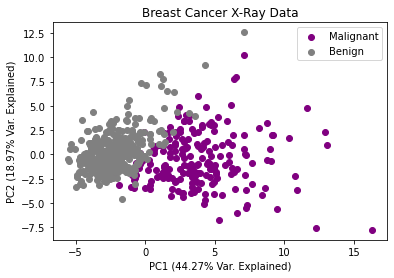

In [7]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data[numeric_cols])

# Create a scatter plot of the first two principal components, colored by diagnosis
plt.scatter(pca_results[data['diagnosis']=='M', 0], pca_results[data['diagnosis']=='M', 1], c='purple', label='Malignant')
plt.scatter(pca_results[data['diagnosis']=='B', 0], pca_results[data['diagnosis']=='B', 1], c='grey', label='Benign')

var_exp = pca.explained_variance_ratio_

# Set axis labels and title
plt.xlabel(f'PC1 ({var_exp[0]*100:.2f}% Var. Explained)')
plt.ylabel(f'PC2 ({var_exp[1]*100:.2f}% Var. Explained)')
plt.title('Breast Cancer X-Ray Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

It looks like there is good separation between classes in PC space. While lack of separation in PC space does not necessarily mean we will be unsuccessful building classification models, good separation in PC space generally means we should be able to create highly performing classification models. PCA is a linear dimensionality reduction technique so I will first try creating linear/generalized linear models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('diagnosis', axis=1), data['diagnosis'], test_size=0.2, random_state=42)

# Fit logistic regression model
lr_model = LogisticRegression(random_state=1111)
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)

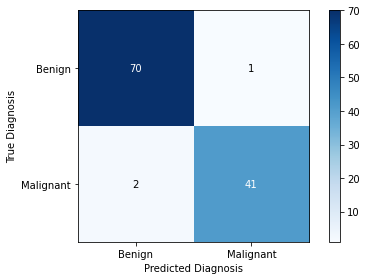


Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [9]:
cm = confusion_matrix(y_test, lr_preds)

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add axis labels and annotations
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
       xlabel='Predicted Diagnosis', ylabel='True Diagnosis')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, lr_preds))

The out of box performance of the logistic regression model is very high with only three cases being misclassified. We could screen other classification models and try to optimize our performance further, but the performance is already so high we can save time and effort and just evaluate our working model!

The most obvious first step in evaluating a logistic regression model is looking at how each feature in the model is contributing to the classification. We can plot each coefficient in our model and color based on whether it is positively or negatively contributing to probability of the classification being Malignant.

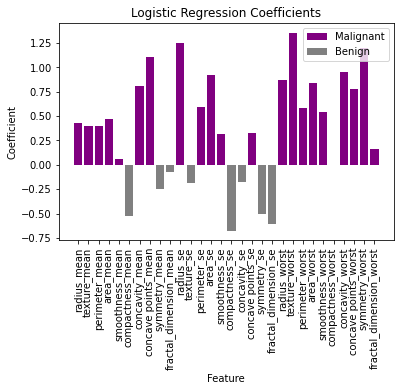

In [10]:
coef = lr_model.coef_[0]
features = X_train.columns

colors = ['grey' if c < 0 else 'purple' for c in coef]

# Create bar chart of coefficients
plt.bar(features, coef, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Logistic Regression Coefficients')

# Create legend
purple_patch = plt.Rectangle((0,0), 1, 1, fc='purple')
grey_patch = plt.Rectangle((0,0), 1, 1, fc='grey')
plt.legend([purple_patch, grey_patch], ['Malignant', 'Benign'], loc='upper right')

plt.show()


Based on our coefficient bar plot, we can see that there are more than 2x feature contributing positively to a Malignant diagnosis. We also know that there some highly correlated features in our data based on our previous correlation plot. Therefore, it is reasonable to assume that we don't need all of the features in the data to correctly classify tumors as Malignant or Benign. 

Instead of trying to optimize the performance of our already highly-performing logistic regression model, we can try to simplify our model using regularization while trying to maintain high predictive performance!

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('diagnosis', axis=1), data['diagnosis'], test_size=0.2, random_state=42)

# Fit logistic regression model
lr_model = LogisticRegression(penalty="l1",solver="liblinear",random_state=1111)
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)

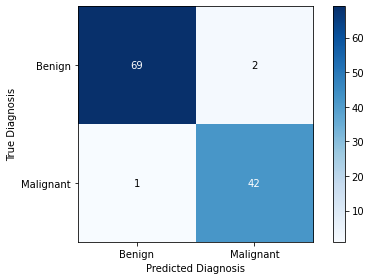


Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
cm = confusion_matrix(y_test, lr_preds)

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add axis labels and annotations
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
       xlabel='Predicted Diagnosis', ylabel='True Diagnosis')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, lr_preds))

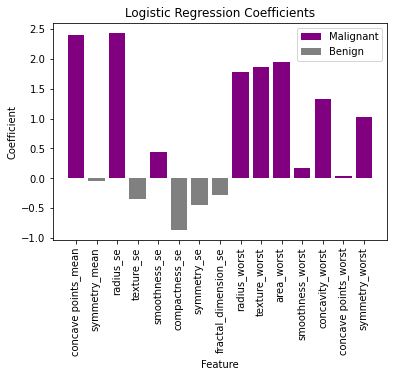

In [13]:
coef = lr_model.coef_[0]
features = X_train.columns

coef_nonzero = coef[np.nonzero(coef)]
features_nonzero = features[np.nonzero(coef)]

colors = ['grey' if c < 0 else 'purple' for c in coef_nonzero]

# Create bar chart of coefficients
plt.bar(features_nonzero, coef_nonzero, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Logistic Regression Coefficients')

# Create legend
purple_patch = plt.Rectangle((0,0), 1, 1, fc='purple')
grey_patch = plt.Rectangle((0,0), 1, 1, fc='grey')
plt.legend([purple_patch, grey_patch], ['Malignant', 'Benign'], loc='upper right')

plt.show()


Implementing L1 regularization was a good choice in this case because we were able to maintain the high predictive performance of our standard logistic regresssion classification model while reducing the number of features needed to make a prediction. This sparser model should be less likely to overfit on training data and generalize better!